In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import statmorph
import h5py

%matplotlib inline

In [2]:
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"f3c97208f4981e63b57bb02c7135912b"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [3]:
r = get(baseUrl)

In [4]:
names = [sim['name'] for sim in r['simulations']]

In [5]:
i = names.index('TNG100-1')

In [6]:
sim = get( r['simulations'][i]['url'] )
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [7]:
sim['snapshots']

'http://www.tng-project.org/api/TNG100-1/snapshots/'

In [8]:
## Import in simulation data at redshift z=0 which corresponds to 99 here

import time
 
tstart = time.time()

#4371211
#100000

url = "http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/?limit=10000&offset=0"
subhalos = get(url)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

Elapsed Time: 3.12s


In [9]:
sub = get(subhalos['results'][1]['url'])
sub

{'snap': 99,
 'id': 1,
 'bhmdot': 0.00023013,
 'cm_x': 124.477,
 'cm_y': 24606.8,
 'cm_z': 16859.1,
 'gasmetallicity': 0.00824652,
 'gasmetallicityhalfrad': 0.0113393,
 'gasmetallicitymaxrad': 0.00360071,
 'gasmetallicitysfr': 0.00724458,
 'gasmetallicitysfrweighted': 0.00745928,
 'pos_x': 106.473,
 'pos_y': 24633.3,
 'pos_z': 16900.6,
 'halfmassrad': 300.959,
 'halfmassrad_gas': 368.526,
 'halfmassrad_dm': 291.904,
 'halfmassrad_stars': 17.0124,
 'halfmassrad_bhs': 0.0,
 'len': 11346853,
 'len_gas': 4454136,
 'len_dm': 6297959,
 'len_stars': 594757,
 'len_bhs': 1,
 'mass': 3666.62,
 'mass_gas': 444.559,
 'mass_dm': 3184.09,
 'mass_stars': 37.8526,
 'mass_bhs': 0.125566,
 'massinhalfrad': 60.3454,
 'massinhalfrad_gas': 0.201578,
 'massinhalfrad_dm': 41.0921,
 'massinhalfrad_stars': 18.9262,
 'massinhalfrad_bhs': 0.125566,
 'massinmaxrad': 2317.39,
 'massinmaxrad_gas': 230.715,
 'massinmaxrad_dm': 2049.46,
 'massinmaxrad_stars': 37.0827,
 'massinmaxrad_bhs': 0.125566,
 'massinrad': 148.

In [10]:
## load in results for subhalos to get data
## get results for one specific subhalo

sub = [] ## array that contains subhalo information 
tstart = time.time()

len_sub = 10

for i in range(len_sub):
    sub.append(get(subhalos['results'][i]['url']))
    print(i)

print(sub)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0
1
2
3
4
5
6
7
8
9
[{'snap': 99, 'id': 0, 'bhmdot': 0.00039801, 'cm_x': 832.387, 'cm_y': 26368.5, 'cm_z': 18060.8, 'gasmetallicity': 0.0077182, 'gasmetallicityhalfrad': 0.00799488, 'gasmetallicitymaxrad': 0.0056164, 'gasmetallicitysfr': 0.00668848, 'gasmetallicitysfrweighted': 0.00668008, 'pos_x': 849.091, 'pos_y': 26327.0, 'pos_z': 18306.9, 'halfmassrad': 607.966, 'halfmassrad_gas': 627.311, 'halfmassrad_dm': 610.31, 'halfmassrad_stars': 47.3881, 'halfmassrad_bhs': 0.0, 'len': 88772413, 'len_gas': 38648183, 'len_dm': 46136876, 'len_stars': 3987343, 'len_bhs': 11, 'mass': 27477.9, 'mass_gas': 3900.6, 'mass_dm': 23325.6, 'mass_stars': 251.016, 'mass_bhs': 0.701811, 'massinhalfrad': 555.356, 'massinhalfrad_gas': 13.5311, 'massinhalfrad_dm': 415.619, 'massinhalfrad_stars': 125.508, 'massinhalfrad_bhs': 0.697652, 'massinmaxrad': 7611.22, 'massinmaxrad_gas': 870.236, 'massinmaxrad_dm': 6518.97, 'massinmaxrad_stars': 221.317, 'massinmaxrad_bhs': 0.6981, 'massinrad': 1549.87, 'massinrad_gas'

In [13]:
data_z0 = pd.DataFrame(sub)
data_z0 = data_z0.drop(['id','snap','bhmdot','cm_x', 'cm_y','cm_z','pos_x','pos_y','pos_z','sfrinhalfrad','sfrinmaxrad', 'sfrinrad',
                  'spin_x','spin_y', 'spin_z', 'prog_snap', 'windmass', 'prog_snap', 'prog_sfid', 'desc_snap','desc_sfid','parent','grnr','primary_flag', 
                 'related','cutouts','trees','supplementary_data','vis','meta'],axis = 1)
data_z0

,gasmetallicity,gasmetallicityhalfrad,gasmetallicitymaxrad,gasmetallicitysfr,gasmetallicitysfrweighted,halfmassrad,halfmassrad_gas,halfmassrad_dm,halfmassrad_stars,halfmassrad_bhs,...,stellarphotometrics_z,stellarphotometricsmassinrad,stellarphotometricsrad,vel_x,vel_y,vel_z,veldisp,vmax,vmaxrad,mass_log_msun
0,0.007718,0.007995,0.005616,0.006688,0.006680,607.9660,627.3110,610.3100,47.3881,0.0,...,-26.3286,139.71200,39.7723,15.8496,-236.3920,-89.5239,603.875,999.385,327.8280,14.608138
1,0.008247,0.011339,0.003601,0.007245,0.007459,300.9590,368.5260,291.9040,17.0124,0.0,...,-24.2839,21.47510,17.2024,126.4250,659.3610,540.5680,333.893,514.776,376.2010,13.733421
2,0.011213,0.012482,0.010222,0.010743,0.011027,78.2494,49.6454,82.6389,14.9840,0.0,...,-24.5975,27.32500,19.1765,322.0790,-886.2590,1115.2000,297.577,461.641,70.9815,13.057590
3,0.020788,0.026441,0.029360,0.018250,0.018392,108.9710,116.4190,113.2260,6.5303,0.0,...,-23.4537,9.19744,13.1857,323.0220,267.6660,997.5420,159.562,291.937,2.3082,12.699525
4,0.013132,0.014942,0.008962,0.010940,0.011017,85.2062,57.3282,89.2432,8.9908,0.0,...,-22.7445,5.13334,7.9731,-526.9000,48.9844,660.0540,168.744,294.433,42.0984,12.681528
5,0.016919,0.016969,0.013345,0.016241,0.016417,66.2267,21.9910,69.1558,8.4702,0.0,...,-23.1542,7.41888,9.4059,-192.5250,-921.3240,-1349.8100,191.308,311.580,76.3478,12.643397
6,0.021241,0.022942,0.020672,0.023408,0.023709,34.0358,13.2843,37.7668,8.7536,0.0,...,-23.5711,15.18040,13.6636,-368.7670,-1041.7300,621.0980,217.871,369.447,21.8305,12.484770
7,0.032358,0.034316,0.034277,0.000000,0.000000,38.2081,9.5684,41.8457,5.7545,0.0,...,-23.0474,8.83506,9.0457,-420.8090,-409.4660,-30.2225,164.370,336.254,2.0350,12.308486
8,0.028674,0.029220,0.034601,0.000000,0.000000,29.2990,4.7350,32.3983,7.0467,0.0,...,-23.1553,10.34190,9.9129,63.6713,-469.3480,778.6590,186.551,329.114,1.6629,12.243038
9,0.000000,0.000000,0.000000,0.000000,0.000000,34.4308,0.0000,38.4753,8.0092,0.0,...,-23.1698,9.56185,10.9860,-1127.2600,-768.4900,-935.5970,173.414,290.874,15.3045,12.280051


Idea : predict if a galaxy has a SFR or not. sort SFR into column of 1s and 0s, heavily skewed towards non star forming since we're at z=0 

In [14]:
data_z0.to_csv('data_z0_file.csv')

In [15]:
Mlog = data['MtotLog'] ## log of total mass in solar units
Mtot = data['Mtot'] ## total mass solar units

## all in units of magnitude
V = data['mV']
G = data['mG']
U = data['mU']
I = data['mI']
B = data['mB']
R = data['mR']
Z = data['mZ']

vel = data['vmax'] ## km/s
vel = np.log10(vel)

NameError: name 'data' is not defined

In [14]:
ug = U-G
gr = G - R
ri = R - I
iz = I - Z

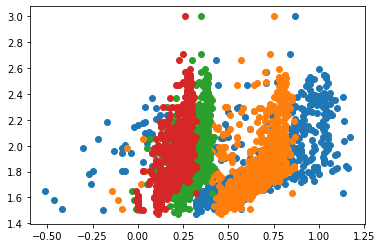

In [15]:
import matplotlib.pyplot as plt

plt.scatter(ug, vel)
plt.scatter(gr, vel)
plt.scatter(ri, vel)
plt.scatter(iz, vel)


Text(0, 0.5, '$i-z$')

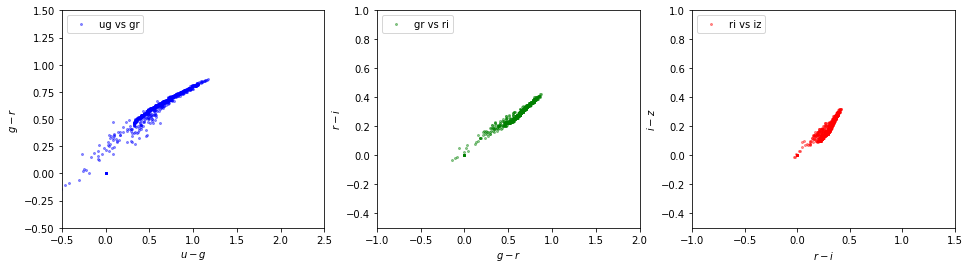

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 1.5)
ax1.plot(ug, gr, '.', ms=4, c='b', label='ug vs gr', alpha=0.4)
ax1.legend(loc=2)
ax1.set_xlabel('$u-g$')
ax1.set_ylabel('$g-r$')

ax2.set_xlim(-1, 2.)
ax2.set_ylim(-0.5, 1.)
ax2.plot(gr, ri, '.', ms=4, c='g', label='gr vs ri', alpha=0.4)
ax2.legend(loc=2)
ax2.set_xlabel('$g-r$')
ax2.set_ylabel('$r-i$')

ax3.set_xlim(-1, 1.5)
ax3.set_ylim(-0.5, 1.)
ax3.plot(ri, iz, '.', ms=4, c='r', label='ri vs iz', alpha=0.4)
ax3.legend(loc=2)
ax3.set_xlabel('$r-i$')
ax3.set_ylabel('$i-z$')

Text(0, 0.5, '$Mass (log Msun$')

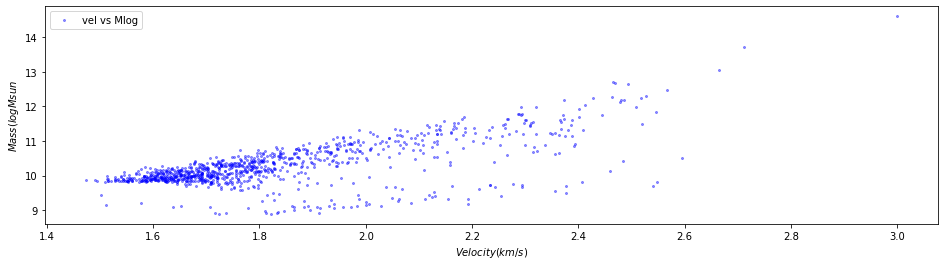

In [17]:
fig, (ax4) = plt.subplots(ncols=1, figsize=(16, 4))

ax4.plot(vel, Mlog, '.', ms=4, c='b', label='vel vs Mlog', alpha=0.4)
ax4.legend(loc=2)
ax4.set_xlabel('$Velocity (km/s)$')
ax4.set_ylabel('$Mass (log Msun$')

Text(0.5, 0, '$Mlog$')

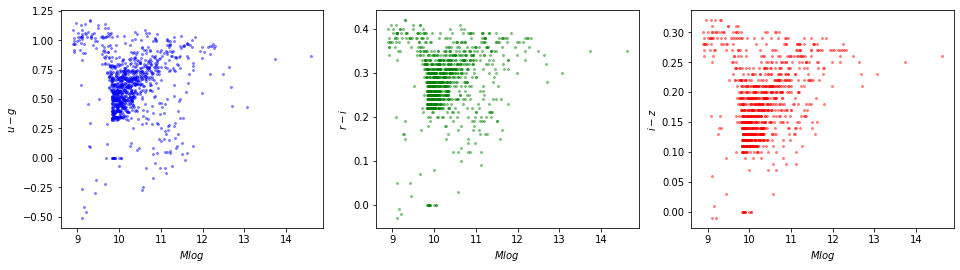

In [18]:
fig, (ax5, ax6, ax7) = plt.subplots(ncols=3, figsize=(16, 4))

ax5.plot(Mlog, ug, '.', ms=4, c='b', alpha=0.4)
ax5.set_ylabel('$u-g$')
ax5.set_xlabel('$Mlog$')

ax6.plot( Mlog, ri, '.', ms=4, c='g', alpha=0.4)
ax6.set_ylabel('$r-i$')
ax6.set_xlabel('$Mlog$')

ax7.plot(Mlog, iz, '.', ms=4, c='r', alpha=0.4)
ax7.set_ylabel('$i-z$')
ax7.set_xlabel('$Mlog$')

Text(0, 0.5, '$Total Mass (Mlog solar units)$')

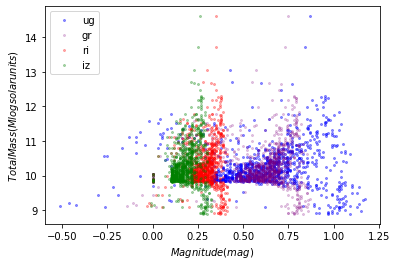

In [19]:
fig, (ax8) = plt.subplots(ncols=1)

ax8.plot(ug, Mlog, '.', ms=4, c='b', label='ug', alpha=0.4)
ax8.plot(gr, Mlog, '.', ms=4, c='purple', label='gr', alpha=0.2)
ax8.plot(ri, Mlog, '.', ms=4, c='r', label='ri', alpha=0.3)
ax8.plot(iz, Mlog, '.', ms=4, c='g', label='iz', alpha=0.3)

ax8.legend(loc=2)

ax8.set_xlabel('$Magnitude (mag)$')
ax8.set_ylabel('$Total Mass (Mlog solar units)$')

Text(0, 0.5, '$Velocity (km/s)$')

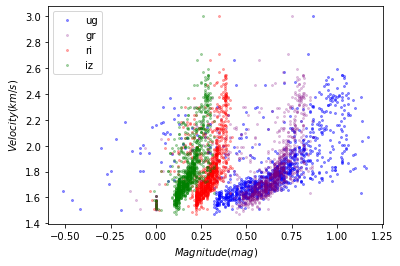

In [20]:
fig, (ax9) = plt.subplots(ncols=1)

ax9.plot(ug, vel, '.', ms=4, c='b', label='ug', alpha=0.4)
ax9.plot(gr, vel, '.', ms=4, c='purple', label='gr', alpha=0.2)
ax9.plot(ri, vel, '.', ms=4, c='r', label='ri', alpha=0.3)
ax9.plot(iz, vel, '.', ms=4, c='g', label='iz', alpha=0.3)

ax9.legend(loc=2)

ax9.set_xlabel('$Magnitude (mag)$')
ax9.set_ylabel('$Velocity (km/s)$')

Text(0.5, 0, '$Velocity (km/s)$')

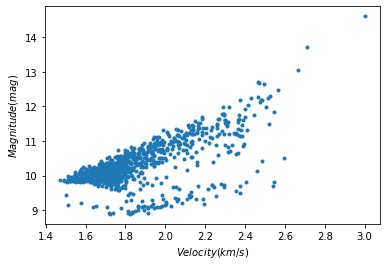

In [21]:
fig, (ax0) = plt.subplots(ncols=1)

ax0.plot(vel, Mlog, '.')
ax0.set_ylabel('$Magnitude (mag)$')
ax0.set_xlabel('$Velocity (km/s)$')

In [22]:
SFR_bool = []

## using for loop to iterate over data and calculate if SN or not
for i in range(1000):
    if (data['SFR'][i]) > 0:
        SFR_bool += [1]
    else:
        SFR_bool += [0]

In [23]:
#data['SFR_bool'] = SFR_bool
#data['SFR_bool']

In [24]:
data = data.drop('SFR',1)
data

,ID,Mtot,MtotLog,mV,mG,mI,mZ,M⋆,Mgas,Mdm,...,y,z,r1/2,"Z⋆(2r1/2,⋆)","Zgas(2r1/2,⋆)",vmax,σv,mU,mB,mR
0,0,27500.000,14.61,-25.38,-24.97,-26.07,-26.33,251.000000,3900.00,23300.000,...,26327.0,18306.9,608.0,0.02860,0.00772,999.4,603.9,-24.10,-24.51,-25.72
1,1,3670.000,13.73,-23.35,-22.95,-24.03,-24.28,37.900000,445.00,3180.000,...,24633.3,16900.6,301.0,0.02130,0.00825,514.8,333.9,-22.11,-22.50,-23.68
2,2,773.000,13.06,-23.78,-23.50,-24.37,-24.60,42.500000,12.60,718.000,...,26725.7,17510.7,78.2,0.02540,0.01120,461.6,297.6,-23.07,-23.13,-24.07
3,3,339.000,12.70,-22.68,-22.41,-23.24,-23.45,11.600000,17.00,311.000,...,26517.4,15888.7,109.0,0.02400,0.02080,291.9,159.6,-21.97,-22.05,-22.96
4,4,325.000,12.68,-21.88,-21.55,-22.51,-22.74,9.030000,9.44,307.000,...,26518.3,15530.5,85.2,0.02000,0.01310,294.4,168.7,-20.95,-21.15,-22.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.454,9.83,-9.55,-9.33,-10.00,-10.11,0.000068,0.00,0.454,...,27158.3,17736.1,10.1,0.00000,0.00000,33.2,17.0,-9.00,-9.00,-9.78
996,996,0.426,9.80,-13.65,-13.30,-14.26,-14.43,0.004540,0.00,0.422,...,26667.2,18078.4,3.6,0.00308,0.00000,51.1,26.2,-12.65,-12.88,-13.95
997,997,0.452,9.82,-9.19,-8.97,-9.65,-9.76,0.000054,0.00,0.452,...,27125.9,17243.2,7.1,0.00000,0.00000,37.4,20.0,-8.65,-8.64,-9.43
998,998,0.452,9.82,0.00,0.00,0.00,0.00,0.000000,0.00,0.452,...,25457.3,17644.9,11.2,0.00000,0.00000,32.3,18.7,0.00,0.00,0.00


In [26]:
from sklearn.model_selection import train_test_split

X = data
y = SFR_bool

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [27]:
from sklearn.ensemble import RandomForestClassifier
import time

model = RandomForestClassifier(n_estimators=100, oob_score=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.oob_score_)

0.988
0.988


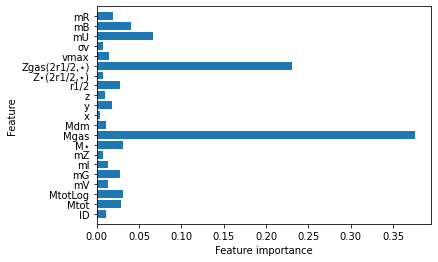

In [29]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

## feature importance plot
def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ('ID','Mtot','MtotLog','mV','mG','mI','mZ','M⋆','Mgas','Mdm','x','y','z','r1/2','Z⋆(2r1/2,⋆)',
                                       'Zgas(2r1/2,⋆)','vmax','σv','mU','mB','mR'))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)